<a href="https://colab.research.google.com/github/RubySongE/Practice-for-5318/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np
from PIL import Image
from numpy import asarray

In [ ]:
#Downloading files
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1kW1X0o-yseKA_UuliOyfQdwr5ff7p7uA'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('text.pkl')

id = '141o_PVV6oxe_gyoERUaipMS5v6qW3U67'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('titles.pkl')

id = '1YbnlRt3Xon5r64XqNlJSdkxYjCcj3HGu'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('beach-sunset-thailand.jpg')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


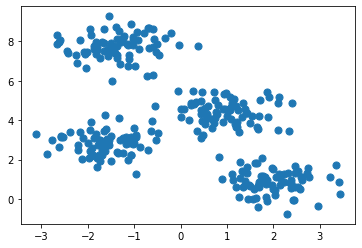

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
#K-Means
from sklearn.cluster import KMeans

# select the parameter k for number of clusters
k=4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

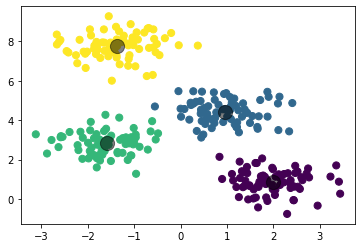

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# K-Means Algorithm: Expectation–Maximization(E–M)

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean of the cluster

<class 'str'>
cosine
[[ 2.00802058  0.83629568]
 [-1.8338064   2.68708805]
 [ 1.01675691  4.38020484]
 [-1.2427258   6.60520853]]
[2 3 2 3 2 0 1 2 3 3 1 3 2 3 0 2 2 0 3 1 0 0 2 1 1 3 0 2 1 2 3 3 2 3 3 3 3
 3 1 0 2 1 3 2 1 3 3 1 3 0 1 0 3 0 0 3 3 1 3 0 3 2 3 3 1 1 3 0 3 1 2 3 3 1
 1 3 1 2 0 3 0 2 0 0 3 2 0 2 3 3 2 0 3 1 3 2 0 0 2 1 3 0 3 0 2 0 0 2 3 2 1
 1 0 3 0 2 3 0 0 2 3 0 3 0 0 0 0 1 0 1 3 1 1 0 3 1 1 3 2 3 3 3 2 3 2 1 3 3
 3 3 3 2 3 2 0 3 3 1 0 2 3 2 2 0 2 1 1 2 0 2 2 3 0 2 3 3 0 0 2 3 0 2 1 1 3
 2 2 2 0 3 2 3 2 2 1 1 1 2 1 3 2 3 0 1 2 3 1 3 2 3 2 1 3 2 3 3 3 0 0 2 3 0
 0 1 0 1 2 3 3 2 2 3 2 0 3 2 0 3 3 1 0 2 0 3 3 3 3 1 1 3 2 1 0 2 1 1 3 0 0
 3 2 2 1 0 3 3 2 3 2 0 0 1 1 2 0 0 0 2 3 3 0 0 2 0 0 0 3 3 3 2 0 0 3 3 3 0
 0 2 2 1]


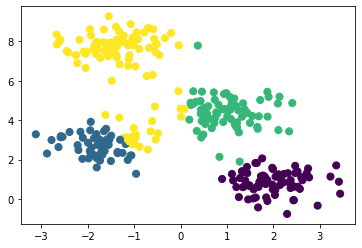

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, metric1, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    print(type(metric1))
    print(metric1)
    
    while True:
        # 2a. Assign labels based on closest center
        # metric can be  'cosine', 'euclidean', 'manhattan'
        #metric1 = 'euclidean'
        labels = pairwise_distances_argmin(X, centers, 1, metric1)
        #labels = pairwise_distances_argmin(X, centers, metric='cosine')
        #labels = pairwise_distances_argmin(X, centers, metric='cosine')
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4, "cosine")
print(centers)
print(labels)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# a) The number of clusters
The common challenge with k-means is that you must tell it how many clusters you expect:

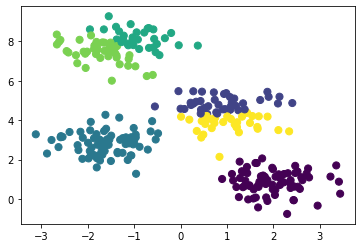

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# b) k-means is limited to linear cluster boundaries

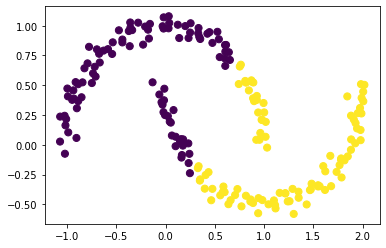

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

We might imagine using the same trick to allow k-means to discover non-linear boundaries.

One version of this kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


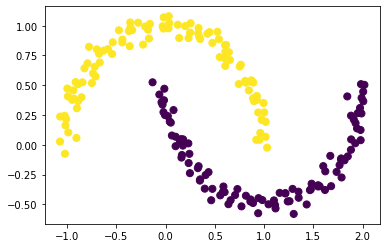

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# Hierarchical Clustering

Agglomerative hierarchical clustering is a "bottom-up" approach

Following are the steps involved in agglomerative clustering:

1. At the start, treat each data point as its own cluster. Therefore, the number of clusters at the start will be K, where K is an integer equal to the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4. Repeat the above three steps until one big cluster is formed.
5. Once a single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrograms in detail in an upcoming section.

Find distance between the clusters (Euclidean or Manhattan distance):

* Measure the distance between the closest points of two clusters.
* Measure the distance between the farthest points of two clusters.
* Measure the distance between the centroids of two clusters.
* Measure the distance between all possible combinations of points between the two clusters and take the mean.

# Movie clustering based on IMDB(Internet Move Database) synopses

In [ ]:
###data_loading
synopsis = pickle.load(open('text.pkl', 'rb'))
titles = pickle.load(open('titles.pkl', 'rb'))

print("Number of titles is", len(titles))

###look at an example
print('Sample title:',titles[0])
print('Sample synopsis:',synopsis[0])

Number of titles is 100
Sample title: The Godfather
Sample synopsis:  Plot  [edit]  [  [  edit  edit  ]  ]  
  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter's wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito's youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adam

## Pre-process the text 

1. Tokenisation is breaking a text down into units - characters, words, or sentences for examples. Last week we used character tokenisation. This week we use sentence and then word tokenisation.

2. After tokenising we will clean the data by removing all tokens containing non-letter characters. We will use the re (regular expression) package to find such tokens.

3. Finally we will perform stemming. Stemming is the crude chopping of affixes from words to produce root forms. Snowball stemming is a stemming method concentrating on suffixes.

In [ ]:
###Synopsis data preprocessing
import nltk
from nltk.stem.snowball import SnowballStemmer
import re

stemmer = SnowballStemmer("english")
nltk.download('punkt')
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Construct a numerical representation of each synopsis

Inverse document frequency (TF-IDF)

* term frequency tf(t,d) for a word t is the number of times it occurs in a document d divided by the number of words in d..

* document frequency df for a word t is the number of times it appears in all documents in the corpus D. Then inverse document frequency is

* idf(t,D) = log(N/(df(t) + 1))

Where N is the number of documents. 

Finally the tf-idf for a word t is

* tf-idf(t,d) = tf(t,d) idf(t,D)

For each document we then construct an ordered vector of tf-idf values for each unique word in the corpus. The legth of the vector is the number of words in the whole corpus.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(100, 563)


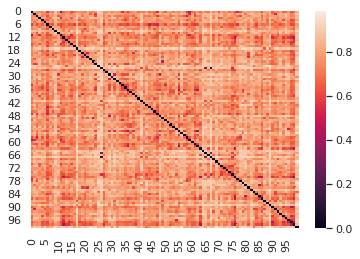

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns; 

### TfidfVectorizer will perform the vectorisation. Please explore the parameters at the user guide
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(synopsis)
print(tfidf_matrix.shape)
dist = 1 - cosine_similarity(tfidf_matrix)

sns.set()
ax = sns.heatmap(dist)

In [ ]:
dist1 = 1*tfidf_matrix
print(tfidf_matrix)

  (0, 4)	0.015840237403117192
  (0, 548)	0.01612420215693917
  (0, 87)	0.013158145917863982
  (0, 168)	0.01127492073118682
  (0, 208)	0.047520712209351584
  (0, 554)	0.015840237403117192
  (0, 427)	0.08485730621728925
  (0, 1)	0.046705079955494354
  (0, 343)	0.06022813901532093
  (0, 108)	0.012147386431826087
  (0, 287)	0.015840237403117192
  (0, 299)	0.013534028158239696
  (0, 306)	0.009010032167901243
  (0, 417)	0.015307582752631105
  (0, 37)	0.01184313106771756
  (0, 15)	0.01334332279941062
  (0, 222)	0.010753148800711149
  (0, 446)	0.013158145917863982
  (0, 437)	0.008289477056589938
  (0, 24)	0.013730602286522562
  (0, 497)	0.016421379232122783
  (0, 82)	0.012305126670905985
  (0, 483)	0.02916724306696112
  (0, 169)	0.0252655923822052
  (0, 200)	0.015568359985164785
  :	:
  (99, 383)	0.08619640541457027
  (99, 358)	0.07672891325500265
  (99, 177)	0.20333482818614418
  (99, 368)	0.09393190975382117
  (99, 215)	0.13192312316278199
  (99, 438)	0.06821489514982466
  (99, 283)	0.335609

In [ ]:
from scipy.cluster.hierarchy import complete, dendrogram

linkage_matrix = complete(dist) #define the linkage_matrix using ward clustering pre-computed distances
linkage_matrix.shape

(99, 4)

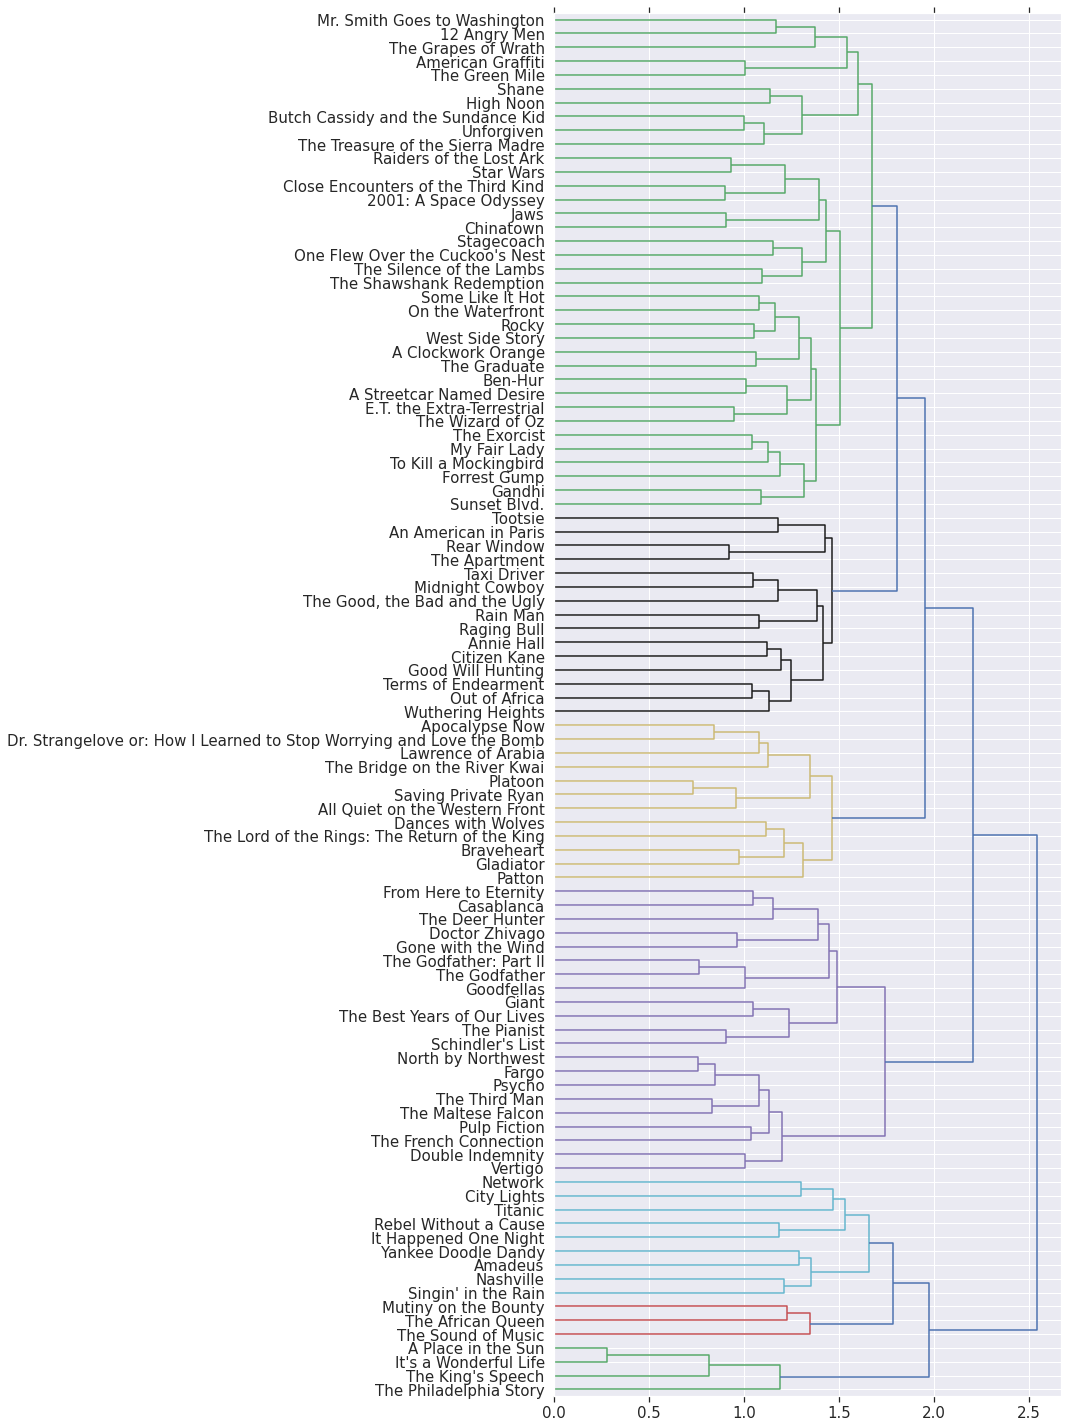

In [ ]:
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize=15
    )
plt.tick_params(\
    axis= 'y',          # changes apply to the y-axis
    labelsize=15
    )

plt.tight_layout() #show plot with tight layout

#save figure as ward_clusters
plt.savefig('ward_clusters.png', dpi=200) 

# Exercise

## k-means for colour compression

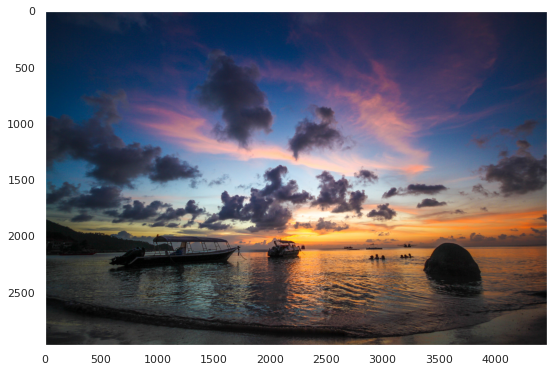

In [ ]:
# load the image
image = Image.open("./beach-sunset-thailand.jpg")
# convert image to numpy array
beach = asarray(image)

plt.figure(figsize=(9,12))
plt.rcParams["axes.grid"] = False
plt.imshow(beach)

In [ ]:
beach.shape

(2973, 4460, 3)

In [ ]:
data = beach / 255.0 # use 0...1 scale
data = data.reshape(-1, 3)
data.shape

(13259580, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

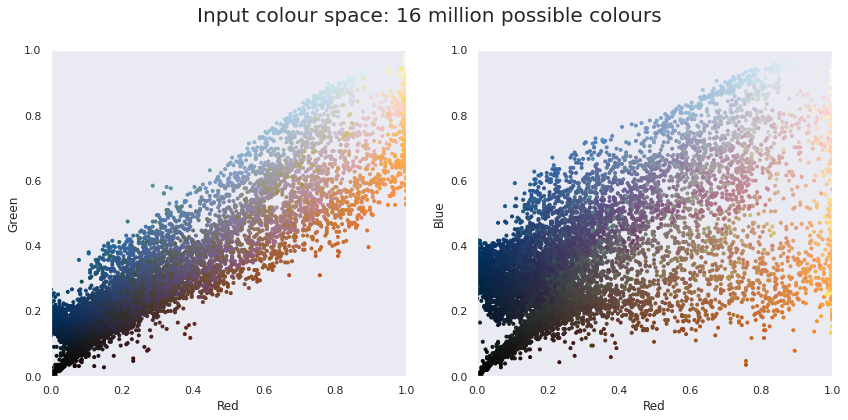

In [ ]:
plot_pixels(data, title='Input colour space: 16 million possible colours')

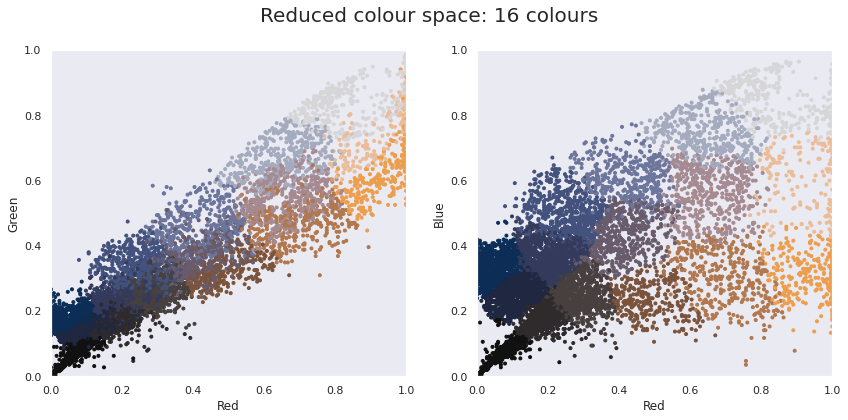

In [ ]:
###As we are using high resolution image this clustering will take two minutes.
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced colour space: 16 colours")

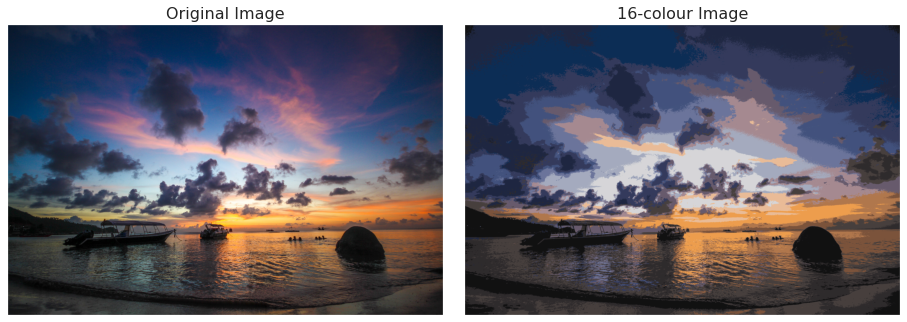

In [ ]:
beach_recoloured = new_colors.reshape(beach.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(beach)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(beach_recoloured)
ax[1].set_title('16-colour Image', size=16);

##Please use k-means clustering to compress the below image to 10-colours, show the compressed image, and compare it to the original image.

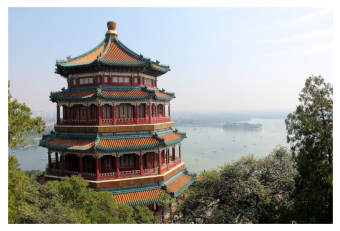

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
china.shape

(427, 640, 3)

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(-1, 3)
data.shape

(273280, 3)

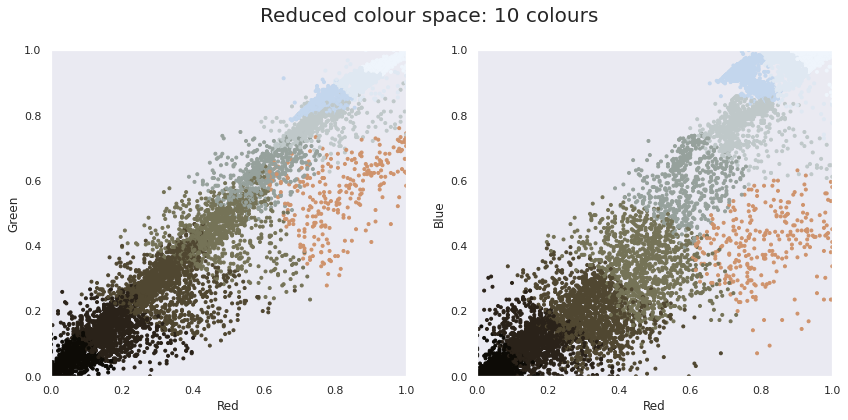

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(10)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced colour space: 10 colours")

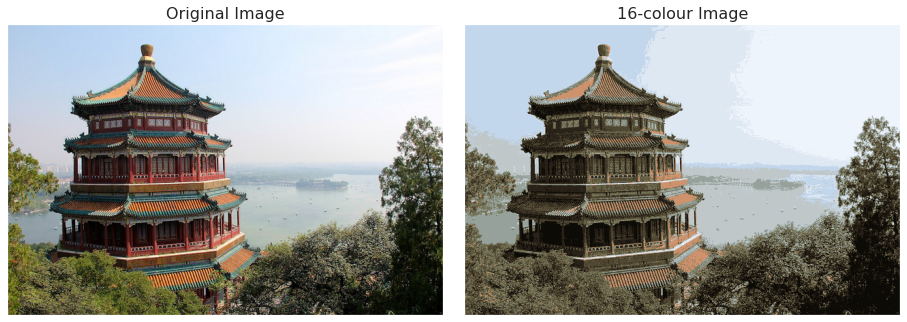

In [ ]:
china_recoloured = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recoloured)
ax[1].set_title('16-colour Image', size=16);